# Basic Linear Regression Model

I will test basic linear regression model on my dara about Mars craters.

In [2]:
import pandas as pd

Mars_df = pd.read_csv('MarsCrater.csv')
Mars_df.head()

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


I want to to investigate a correlation between diameters and depth.

In [3]:
x = Mars_df['DIAM_CIRCLE_IMAGE'].to_numpy().reshape(-1, 1)
y = Mars_df['DEPTH_RIMFLOOR_TOPOG'].values

 These columns are not categorical, and i only have to center them. I’m doing it with the sklearn scaler.

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x_train = scaler.transform(x)

In [5]:
x_train.mean()

-1.1240219890622202e-17

So, the mean is small and close to zero. 

<AxesSubplot:>

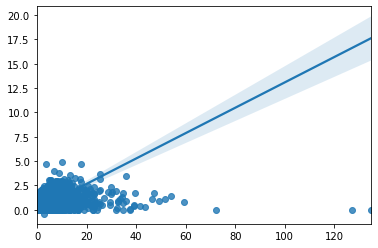

In [9]:
import seaborn
plot = seaborn.regplot(x=x_train, y=y, scatter=True, data=Mars_df)
plot

On the plot we can see that the linear regression is not the best model for this data, but we can use it.

In [7]:
import statsmodels.formula.api as smf

C:\Users\M\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
results = smf.ols('y ~ x_train', data=Mars_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                 2.018e+05
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:25:41   Log-Likelihood:             1.1503e+05
No. Observations:              384343   AIC:                        -2.301e+05
Df Residuals:                  384341   BIC:                        -2.300e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0758      0.000    262.096      0.0

We have R^2 about 0.344, and it is good. We have some sort of correlation. P-values are not bad either. We also got normal coefficients (y = 0.0758x + 0.13), which is pretty